In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import clear_output, display

# Titanic

In [44]:
df = pd.read_csv('titanic_data.csv', index_col="PassengerId")
df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [12]:
print(len(df))
print(df.shape)
df.info()

891
(891, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [13]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
print("male_count:", len(df[df["Sex"] == "male"])) # df["Sex"].value_counts()["male"]
print("female_count:", len(df[df["Sex"] == "female"])) # df["Sex"].value_counts()["female"]
print("other_sex_count:", len(df[(df["Sex"] == "male") & (df["Sex"] == "female")]))

# ---

dfd = df.describe()
print("min age:", dfd["Age"]["min"]) # df["Age"].min()
print("max age:", dfd["Age"]["max"]) # df["Age"].max()
print("avg age:", dfd["Age"]["mean"]) # df["Age"].mean()

# ---

df["Pclass"].value_counts().sort_index()


male_count: 577
female_count: 314
other_sex_count: 0
min age: 0.42
max age: 80.0
avg age: 29.69911764705882


Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [34]:
df.groupby(['Pclass'])[["Age"]].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [43]:
dfs = pd.read_csv('titanic_surv.csv')
dfs.index = np.arange(1, len(dfs) + 1)
dfs

,Survived
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0
890,1


In [45]:
dfs.sample(frac=1) # randomize the order

,Survived
83,1
15,0
231,1
784,0
361,0
...,...
10,1
363,0
546,0
523,0


In [48]:
dfg = df.join(dfs)
dfg

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0


In [62]:
display(dfg.groupby(['Sex'])[["Survived"]].sum())
# Survived total: 
# dfg["Survived"].sum()
# (dfg["Survived"]==1).sum()
dfg["Survived"].value_counts()

,Survived
Sex,
female,233
male,109


Survived
0    549
1    342
Name: count, dtype: int64

In [64]:
ssd = dfg[["Sex", "Age", "Survived"]]
ssd["Sex"] = (ssd["Sex"] == "female").astype(int)
ssd

C:\Users\sentenzo\AppData\Local\Temp\ipykernel_17196\1291517544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssd["Sex"] = (ssd["Sex"] == "female").astype(int)


,Sex,Age,Survived
PassengerId,,,
1,0,22.0,0
2,1,38.0,1
3,1,26.0,1
4,1,35.0,1
5,0,35.0,0
...,...,...,...
887,0,27.0,0
888,1,19.0,1
889,1,NaN,0


In [65]:
ssd.corr()

,Sex,Age,Survived
Sex,1.000000,-0.093254,0.543351
Age,-0.093254,1.000000,-0.077221
Survived,0.543351,-0.077221,1.000000


<AxesSubplot: >

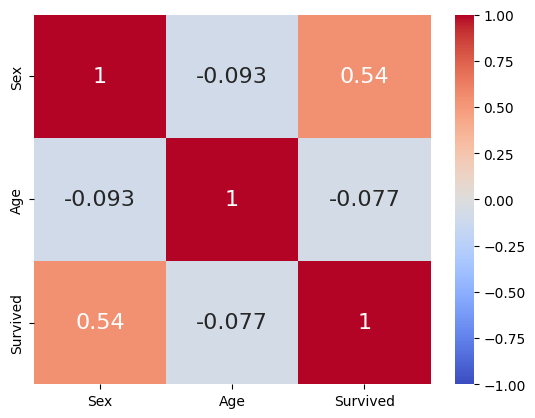

In [68]:
sns.heatmap(ssd.corr(), annot=True, cmap="coolwarm",
            vmin=-1, vmax=1, annot_kws={"size": 16})